# This is a simple example of how to load and plot the provided data.

In [1]:
import zarr
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
# Load the data (update the path to the correct location)
data_path = "processed_data_cse151b_v2_corrupted_ssp245/processed_data_cse151b_v2_corrupted_ssp245.zarr"
data = xr.open_zarr(data_path)

data

<xarray.Dataset> Size: 621MB
Dimensions:    (ssp: 4, time: 1021, latitude: 48, longitude: 72, x: 72, y: 48,
                member_id: 3)
Coordinates:
    lat        (x, y) float64 28kB ...
  * latitude   (latitude) float64 384B -89.05 -85.26 -81.47 ... 85.26 89.05
    lon        (x, y) float64 28kB ...
  * longitude  (longitude) float64 576B 1.25 6.25 11.25 ... 346.2 351.2 356.2
  * member_id  (member_id) int64 24B 0 1 2
  * ssp        (ssp) <U6 96B 'ssp126' 'ssp245' 'ssp370' 'ssp585'
  * time       (time) object 8kB 2015-01-15 00:00:00 ... 2100-01-15 00:00:00
  * x          (x) float64 576B 1.875 6.875 11.88 16.88 ... 346.9 351.9 356.9
  * y          (y) float64 384B -88.59 -84.82 -81.05 ... 81.05 84.82 88.59
Data variables:
    BC         (ssp, time, latitude, longitude) float64 113MB ...
    CH4        (ssp, time) float64 33kB ...
    CO2        (ssp, time) float64 33kB ...
    SO2        (ssp, time, latitude, longitude) float64 113MB ...
    pr         (ssp, time, member_id, y, x) float32 169MB ...
    rsdt       (ssp, time, y, x) float32 56MB ...
    tas        (ssp, time, member_id, y, x) float32 169MB ...
Attributes:
    original_member_ids:  ['r10i1p1f1', 'r11i1p1f1', 'r4i1p1f1']
    precipitation_units:  mm/day (converted from kg m-2 s-1)
    source:               CMIP6 data processed for CSE151B
    ssp:                  ssp126

In [3]:
data

<xarray.Dataset> Size: 621MB
Dimensions:    (ssp: 4, time: 1021, latitude: 48, longitude: 72, x: 72, y: 48,
                member_id: 3)
Coordinates:
    lat        (x, y) float64 28kB ...
  * latitude   (latitude) float64 384B -89.05 -85.26 -81.47 ... 85.26 89.05
    lon        (x, y) float64 28kB ...
  * longitude  (longitude) float64 576B 1.25 6.25 11.25 ... 346.2 351.2 356.2
  * member_id  (member_id) int64 24B 0 1 2
  * ssp        (ssp) <U6 96B 'ssp126' 'ssp245' 'ssp370' 'ssp585'
  * time       (time) object 8kB 2015-01-15 00:00:00 ... 2100-01-15 00:00:00
  * x          (x) float64 576B 1.875 6.875 11.88 16.88 ... 346.9 351.9 356.9
  * y          (y) float64 384B -88.59 -84.82 -81.05 ... 81.05 84.82 88.59
Data variables:
    BC         (ssp, time, latitude, longitude) float64 113MB ...
    CH4        (ssp, time) float64 33kB ...
    CO2        (ssp, time) float64 33kB ...
    SO2        (ssp, time, latitude, longitude) float64 113MB ...
    pr         (ssp, time, member_id, y, x) float32 169MB ...
    rsdt       (ssp, time, y, x) float32 56MB ...
    tas        (ssp, time, member_id, y, x) float32 169MB ...
Attributes:
    original_member_ids:  ['r10i1p1f1', 'r11i1p1f1', 'r4i1p1f1']
    precipitation_units:  mm/day (converted from kg m-2 s-1)
    source:               CMIP6 data processed for CSE151B
    ssp:                  ssp126

## Plot a few snapshots of temperature and precipitation (first, middle, and last)

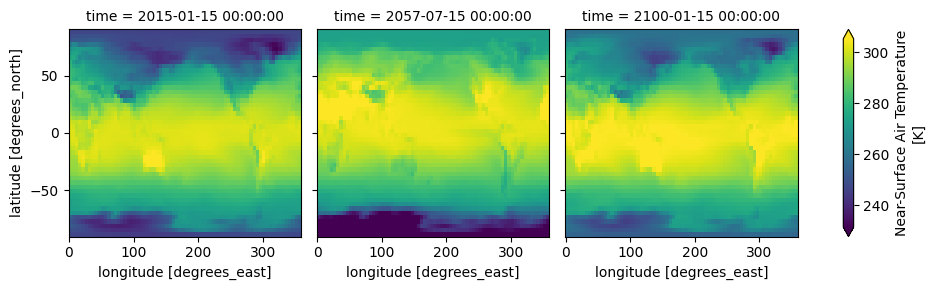

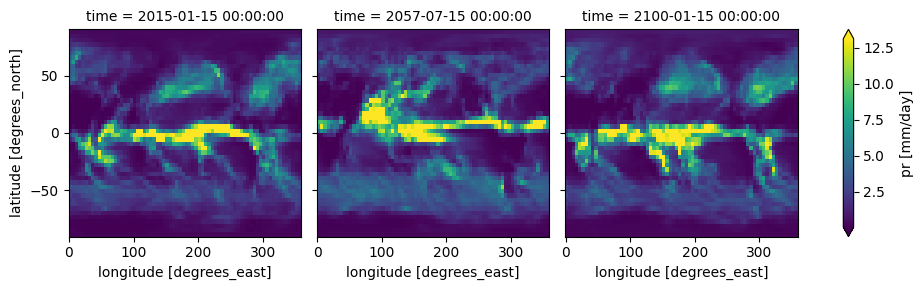

In [4]:
data_subset = data.isel(time=[0, data.time.size // 2, -1]).sel(ssp="ssp370", member_id=0)
data_subset.tas.plot(col="time", x="x", y="y", robust=True)
data_subset.pr.plot(col="time", x="x", y="y", robust=True)

# Plot the time series of global mean temperature and precipitation

Note that we do not plot the SSP245 scenario here, as it is corrupted in the provided data.

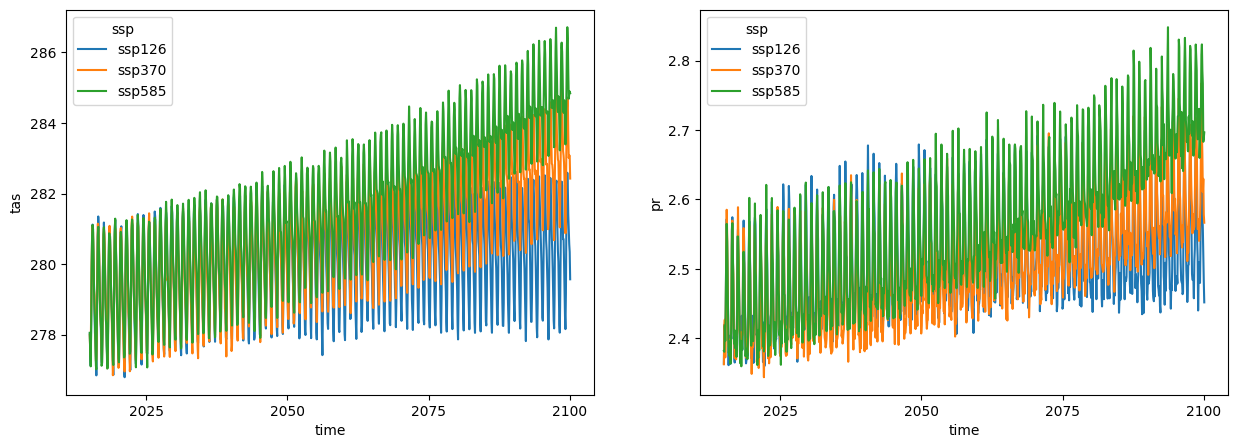

In [5]:
global_mean_data = data.sel(ssp=["ssp126", "ssp370", "ssp585"]).mean(dim=["x", "y", "member_id"])  # also average over all ensemble members
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
global_mean_data.tas.plot(label="Temperature", ax=ax[0], hue="ssp")
global_mean_data.pr.plot(label="Precipitation", ax=ax[1], hue="ssp")# Plot the time series of global mean temperature and precipitation

# Plot the (global mean) time series of climate forcings

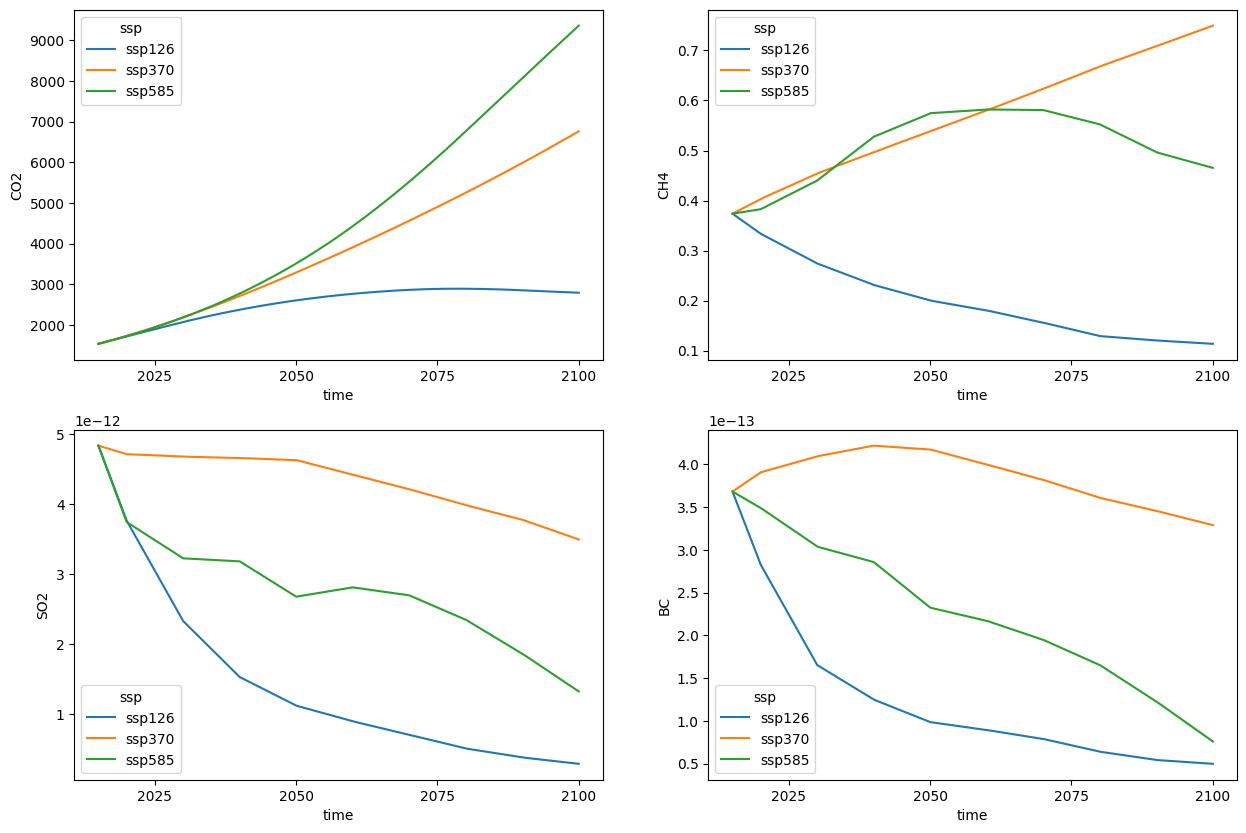

In [6]:
global_mean_data = data.sel(ssp=["ssp126", "ssp370", "ssp585"]).mean(dim=["longitude", "latitude", "member_id"]) 
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()
global_mean_data.CO2.plot(ax=axes[0], hue="ssp")
global_mean_data.CH4.plot(ax=axes[1], hue="ssp")
global_mean_data.SO2.plot(ax=axes[2], hue="ssp")
_ = global_mean_data.BC.plot(ax=axes[3], hue="ssp")

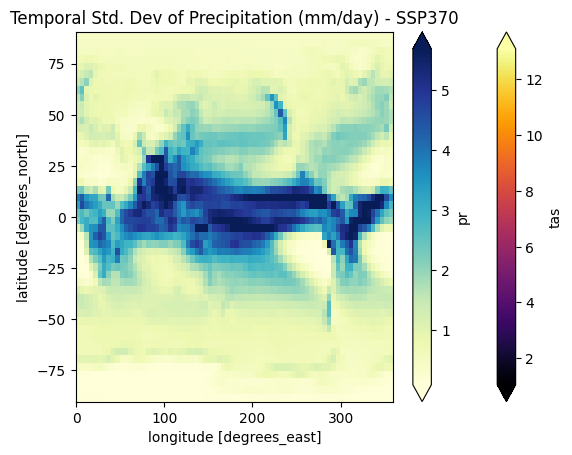

In [7]:
# Standard deviation over time (for tas and pr) in SSP370
data_ssp370 = data.sel(ssp="ssp370", member_id=0)
std_map = data_ssp370.std(dim="time")

# Plot temporal variability (tas)
std_map.tas.plot(cmap="inferno", robust=True)
plt.title("Temporal Std. Dev of Near-Surface Temperature (K) - SSP370")
plt.savefig("stddev_tas_ssp370.png", dpi=300)

# Plot temporal variability (pr)
std_map.pr.plot(cmap="YlGnBu", robust=True)
plt.title("Temporal Std. Dev of Precipitation (mm/day) - SSP370")
plt.savefig("stddev_pr_ssp370.png", dpi=300)


C:\Users\litia\AppData\Local\Temp\ipykernel_16032\1698999982.py:11: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


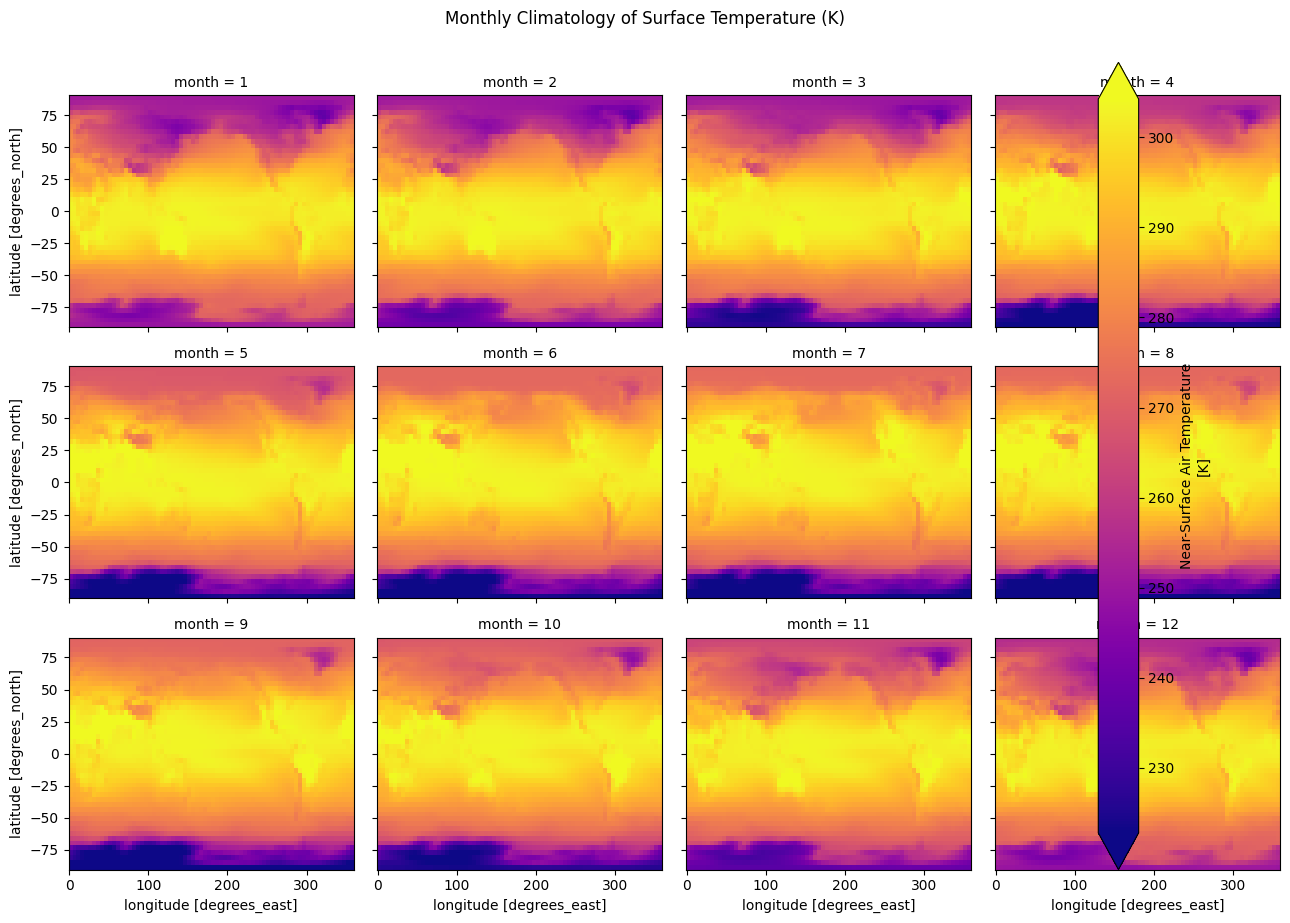

In [9]:
# Monthly climatology of tas and pr
monthly_mean = data_ssp370.groupby("time.month").mean()

monthly_mean.tas.plot(
    col="month", 
    col_wrap=4, 
    cmap="plasma", 
    robust=True
)
plt.suptitle("Monthly Climatology of Surface Temperature (K)", y=1.02)
plt.tight_layout()
plt.savefig("monthly_climatology_tas.png", dpi=300)



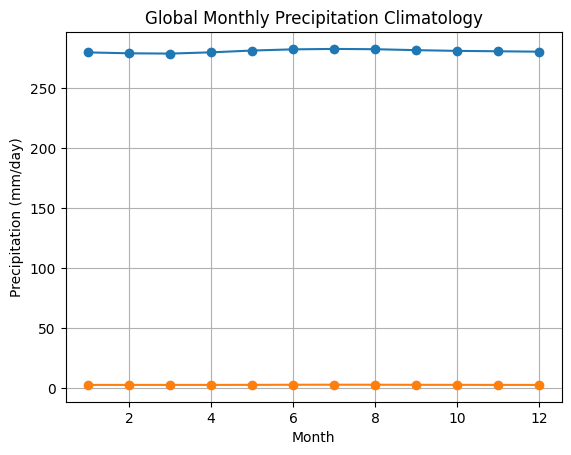

In [10]:
# Global average over latitude and longitude
monthly_cycle_tas = monthly_mean.tas.mean(dim=["y", "x"])
monthly_cycle_pr = monthly_mean.pr.mean(dim=["y", "x"])

# Plot line chart
monthly_cycle_tas.plot(marker='o')
plt.title("Global Monthly Temperature Climatology")
plt.xlabel("Month")
plt.ylabel("Temperature (K)")
plt.grid(True)
plt.savefig("global_monthly_cycle_tas.png", dpi=300)

monthly_cycle_pr.plot(marker='o')
plt.title("Global Monthly Precipitation Climatology")
plt.xlabel("Month")
plt.ylabel("Precipitation (mm/day)")
plt.grid(True)
plt.savefig("global_monthly_cycle_pr.png", dpi=300)
